<a href="https://colab.research.google.com/github/JaeHoonKOR/NLP/blob/Colab/TF_IDF_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#문서를 읽어들이고 확인하기.
with open('./sample_data/sample.txt', 'r') as f:
    docs = f.readlines()
for id, doc in enumerate(docs):
    print('[{}] : {}...'.format(id, doc[:30]))

[0] : BTS, also known as the Bangtan...
[1] : [5] The septet—consisting of m...
[2] : Originally a hip hop group, th...
[3] : Their lyrics, often focused on...
[4] : Their work also often referenc...
[5] : After debuting in 2013 with th...
[6] : The group's second Korean stud...
[7] : By 2017, BTS crossed into the ...
[8] : They became the first Korean g...
[9] : BTS became one of the few grou...
[10] : In 2020, BTS became the first ...
[11] : Their follow-up releases "Sava...
[12] : Having sold over 20 million al...
[13] : They are the first Asian and n...
[14] : Featured on Time's internation...
[15] : The group's numerous accolades...
[16] : Outside of music, they partner...


In [ ]:
#TF-IDF 벡터를 생성하고 확인하기
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(docs)
print('type of tfidf_matrix {}'.format(type(tfidf_matrix)))
print('shape of tfidf_matrix {}'.format(tfidf_matrix.shape))


type of tfidf_matrix <class 'scipy.sparse._csr.csr_matrix'>
shape of tfidf_matrix (17, 279)


In [ ]:
#TfidfVectorizer()를 통해 만들어진 단어 사전 확인하기.
vocab = sorted(tfidf.vocabulary_.items())
vocab[10:20]

[('2019', 10),
 ('2020', 11),
 ('24', 12),
 ('25', 13),
 ('45', 14),
 ('accolades', 15),
 ('accumulate', 16),
 ('act', 17),
 ('addressed', 18),
 ('after', 19)]

In [ ]:
#tf-idf 벡터 메트릭스를 Pandas 데이터프레임 형태로 변환하고 확인하기.
import pandas as pd
df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
df.head(5)

,100,20,200,2010,2010s,2013,2014,2016,2017,2018,...,wings,with,work,world,writes,year,years,youngest,yourself,youth
0,0.0,0.0,0.0,0.231975,0.0,0.202557,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.224235,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.184249
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.286997,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [ ]:
#각 문서에서 가장 중요한 단어 3개를 선정하고 확인하기. (인덱스와 가중치로 출력)
tfidf_table = tfidf_matrix.toarray()
keywords = []
for weight in tfidf_table:
    w_vec = list(enumerate(weight))
    w_vec = sorted(w_vec, key=lambda x : x[1], reverse=True)
    print(w_vec[:3])
    keywords.append(w_vec)


[(3, 0.2319753109745814), (43, 0.2319753109745814), (44, 0.2319753109745814)]
[(63, 0.44846934050962955), (67, 0.22423467025481478), (121, 0.22423467025481478)]
[(89, 0.2913728403081426), (105, 0.2913728403081426), (116, 0.2913728403081426)]
[(20, 0.36849717258087467), (178, 0.27450131318216087), (180, 0.22410956369129728)]
[(25, 0.2869968352173643), (28, 0.2869968352173643), (66, 0.2869968352173643)]
[(21, 0.3950821629525769), (143, 0.3503821312466642), (235, 0.31427634964973317)]
[(7, 0.3050974604643944), (70, 0.3050974604643944), (217, 0.3050974604643944)]
[(132, 0.47053339357158536), (241, 0.2610022040778573), (54, 0.23526669678579268)]
[(36, 0.28724185972682575), (241, 0.2712474009036821), (94, 0.22304852454237598)]
[(241, 0.2945366066990319), (181, 0.2841098984818939), (30, 0.19912088899421726)]
[(50, 0.34191261646406806), (23, 0.23963242573543378), (83, 0.23963242573543378)]
[(247, 0.22973151577047957), (16, 0.2169047253668671), (57, 0.2169047253668671)]
[(48, 0.3715543528675553

In [ ]:
#위 코드에서 선정한 상위 3개 키워드를 단어로 확인(출력).
for i, doc_keywords in enumerate(keywords):
    print(f"Document {i+1} keywords: {[vocab[idx][0] for idx, weight in doc_keywords[:3]]}")


Document 1 keywords: ['2010', 'band', 'bangtan']
Document 2 keywords: ['co', 'consisting', 'hope']
Document 3 keywords: ['evolved', 'genres', 'hip']
Document 4 keywords: ['age', 'of', 'on']
Document 5 keywords: ['alternative', 'an', 'concepts']
Document 6 keywords: ['album', 'language', 'studio']
Document 7 keywords: ['2016', 'copies', 'second']
Document 8 keywords: ['into', 'the', 'breaking']
Document 9 keywords: ['as', 'the', 'first']
Document 10 keywords: ['the', 'one', 'answer']
Document 11 keywords: ['billboard', 'all', 'dynamite']
Document 12 keywords: ['to', 'accumulate', 'butter']
Document 13 keywords: ['best', 'selling', 'the']
Document 14 keywords: ['stadium', 'to', 'of']
Document 15 keywords: ['influential', 'most', 'people']
Document 16 keywords: ['awards', 'music', '24']
Document 17 keywords: ['of', 'the', 'to']


In [ ]:
# 상위 3개 키워드 맞는지 확인해보기
vocab = sorted(tfidf.vocabulary_.items())
for idx, weight in keywords[0][:3]:
    print(vocab[idx])


('2010', 3)
('band', 43)
('bangtan', 44)


In [ ]:
#TF-IDF 가중치의 합이 높은 문서 순으로 정렬하고, 그 중 상위 2개의 문서를 출력하기.
import numpy as np
def tfidf_rank(tfidf_matrix):
    rank = []
    avg, stddev = 0.0, 0.0
    for idx, tfidf in enumerate(tfidf_matrix):
        rank.append((idx, tfidf.sum()))

    rank.sort(key=lambda x : x[1], reverse=True)
    
    tfidf_sum = [tfidf.sum() for tfidf in tfidf_matrix]
    avg = np.mean(tfidf_sum)
    stddev = np.std(tfidf_sum)
    return rank, avg, stddev

rank, avg, stddev = tfidf_rank(tfidf_matrix)
print(rank[:2])
print('avg = {}, stddev = {}'.format(avg, stddev))

rank_doc = [docs[doc_id[0]] for doc_id in rank[:2]]
print(rank_doc)


[(13, 6.693423095412076), (16, 6.186613095039844)]
avg = 4.853519357129592, stddev = 0.8320478309229976
["They are the first Asian and non-English speaking act to be named International Federation of the Phonographic Industry (IFPI) Global Recording Artist of the Year (2020), to chart on Billboard's Top Touring Artists of the 2010s (placing at number 45), and to headline and sell out Wembley Stadium and Rose Bowl Stadium (Love Yourself World Tour in 2019).\n", 'Outside of music, they partnered with UNICEF to establish the Love Myself anti-violence campaign, addressed three United Nations General Assemblies, and became the youngest ever recipients of the Order of Cultural Merit from the President of South Korea due to their contributions in spreading Korean culture and language.']


In [ ]:
#TF-IDF로 만들어진 벡터 메트릭스에서 단어의 빈도수를 계산하여 내림차순으로 정렬한 후
# 상위 10개 단어의 빈도수를 출력하기. (불용어가 포함되어있습니다.)
df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
result = df.sum()
result = result.sort_values(ascending=False)
print(result[:10])


the       2.574203
and       1.713037
of        1.610464
to        1.371285
their     1.250107
in        1.210924
korean    1.055683
on        0.980620
album     0.968351
first     0.884761
dtype: float64


In [ ]:
#불용어를 제거한후 TF-IDF로 만들어진 벡터 메트릭스에서 단어의 빈도수를 계산.
tfidf2 = TfidfVectorizer(stop_words='english')
tfidf_matrix2 = tfidf2.fit_transform(docs)
print('shape of tfidf_matrix2 = {}'.format(tfidf_matrix2.shape))
df = pd.DataFrame(tfidf_matrix2.toarray(), columns=tfidf2.get_feature_names_out())
result = df.sum()
result = result.sort_values(ascending=False)
print(result[:10])


shape of tfidf_matrix2 = (17, 222)
korean       1.313829
album        1.164872
bts          1.078723
south        1.007459
billboard    0.845713
studio       0.818018
love         0.784407
group        0.782621
music        0.765502
awards       0.738452
dtype: float64


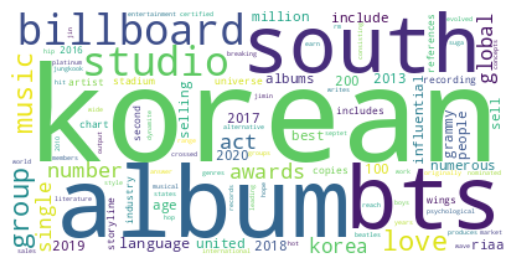

In [ ]:
#matplotlib과 WordCloud 라이브러리를 사용하여 주어진 단어 빈도수를 시각화하기.
import matplotlib.pyplot as plt
from wordcloud import WordCloud
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(result)
plt.imshow(Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#TF-IDF로 벡터화된 문서들의 코사인 유사도를 계산하고, 유사도가 높은 문서 쌍을 출력하기.
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
def cosine_sim_rank(tfidf_matrix):
    cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    print('shape of cos_sim table {}'.format(cos_sim.shape))
    sim_scores = []
    for idx, sim in enumerate(cos_sim):
        sim = list(enumerate(sim))
        sim = sorted(sim, key=lambda x: x[1], reverse=True)
        sim_scores.append(((idx, sim[1][0]), sim[1][1]))
    sim_scores.sort(key=lambda x : x[1], reverse=True)
    return sim_scores

sim_scores = cosine_sim_rank(tfidf_matrix)
for i, score in enumerate(sim_scores):
    print(score, end='\t')
    if (i + 1) % 2 == 0:
        print('\n')


shape of cos_sim table (17, 17)
((8, 10), 0.3372686325213875)	((10, 8), 0.3372686325213875)	

((9, 8), 0.3011090461223652)	((13, 8), 0.2714798133475461)	

((5, 6), 0.2488260451192954)	((6, 5), 0.2488260451192954)	

((16, 8), 0.2360927706012802)	((12, 6), 0.22418440400490164)	

((14, 13), 0.21292225768402728)	((11, 9), 0.2053342871074248)	

((3, 14), 0.16560870640209852)	((0, 12), 0.16468801043745135)	

((7, 9), 0.14369019524697718)	((1, 16), 0.11896187725611843)	

((15, 7), 0.10008635253045675)	((4, 3), 0.09522662738619715)	

((2, 8), 0.0936256100326648)	

In [ ]:
#가장 유사도가 높은 문서 쌍을 출력하고 확인하기
import textwrap

print("Document 8:")
print(textwrap.fill(docs[8], width=90))
print('\n')
print(textwrap.fill(docs[10], width=90))

Document 8:
They became the first Korean group to receive a certification from the Recording Industry
Association of America (RIAA) for their single "Mic Drop", as well as the first Korean act
to top the US Billboard 200 with their studio album Love Yourself: Tear (2018).


In 2020, BTS became the first all-South Korean act to reach number one on the Billboard
Global 200 and US Billboard Hot 100 with their Grammy-nominated single "Dynamite".


In [ ]:
#TF-IDF 행렬의 코사인 유사도를 계산하여, 그 결과를 데이터프레임으로 출력하기.
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

cos_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
pd.DataFrame(cos_sim)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.021340,0.000000,0.029224,0.059047,0.112296,0.135950,0.058618,0.096438,0.107047,0.103473,0.027872,0.164688,0.052855,0.104759,0.016430,0.074601
1,0.021340,1.000000,0.046464,0.115337,0.049225,0.031911,0.024263,0.036071,0.060695,0.058659,0.041101,0.030552,0.054728,0.100453,0.075911,0.026470,0.118962
2,0.000000,0.046464,1.000000,0.051419,0.018222,0.025477,0.089546,0.000000,0.093626,0.030580,0.034796,0.049220,0.013350,0.066136,0.055863,0.063957,0.083071
3,0.029224,0.115337,0.051419,1.000000,0.095227,0.031276,0.027624,0.053350,0.076685,0.082332,0.084546,0.065597,0.102135,0.150609,0.165609,0.034800,0.151519
4,0.059047,0.049225,0.018222,0.095227,1.000000,0.040843,0.019080,0.018467,0.022936,0.015630,0.033796,0.030590,0.014582,0.045071,0.050848,0.027103,0.035454
5,0.112296,0.031911,0.025477,0.031276,0.040843,1.000000,0.248826,0.031334,0.208543,0.112640,0.144573,0.070302,0.125749,0.040613,0.032079,0.009474,0.110331
6,0.135950,0.024263,0.089546,0.027624,0.019080,0.248826,1.000000,0.047150,0.242247,0.227983,0.188244,0.094269,0.224184,0.121197,0.043339,0.034012,0.141087
7,0.058618,0.036071,0.000000,0.053350,0.018467,0.031334,0.047150,1.000000,0.092076,0.143690,0.118264,0.042225,0.122982,0.094610,0.120968,0.100086,0.130423
8,0.096438,0.060695,0.093626,0.076685,0.022936,0.208543,0.242247,0.092076,1.000000,0.301109,0.337269,0.141334,0.129099,0.271480,0.124733,0.073682,0.236093
9,0.107047,0.058659,0.030580,0.082332,0.015630,0.112640,0.227983,0.143690,0.301109,1.000000,0.248100,0.205334,0.177006,0.185391,0.122484,0.054417,0.175005


# 새 섹션